## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [25]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
title_basics_df = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
le_ratings_df = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
movie_gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")

In [27]:
from glob import glob

In [28]:
csv_files = glob("zippedData/*.csv.gz")

In [29]:
csv_files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [30]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [31]:
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [32]:
title_basics_df = csv_files_dict['imdb_title_crew_gz']

In [33]:
csv_files_dict['tmdb_movies_gz']

genre_ids      id original_language  \
0          [12, 14, 10751]   12444                en   
1      [14, 12, 16, 10751]   10191                en   
2            [12, 28, 878]   10138                en   
3          [16, 35, 10751]     862                en   
4            [28, 878, 12]   27205                en   
...                    ...     ...               ...   
26512             [27, 18]  488143                en   
26513             [18, 53]  485975                en   
26514         [14, 28, 12]  381231                en   
26515      [10751, 12, 28]  366854                en   
26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                          How to Train Your Dragon      28.734   2010-03-26   
2                                        Iron Man 2      28.515   2010-05-07   
3                                         Toy Story      28.005   1995-11-22   
4                                         Inception      27.920   2010-07-16   
...                                             ...         ...          ...   
26512                         Laboratory Conditions       0.600   2018-10-13   
26513                               _EXHIBIT_84xxx_       0.600   2018-05-01   
26514                                  The Last One       0.600   2018-10-01   
26515                                  Trailer Made       0.600   2018-06-22   
26516                                    The Church       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[26517 rows x 9 columns]

In [34]:
bom_movie_gross = csv_files_dict['bom_movie_gross_gz']

# Analyzing movie gross

In [35]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


A quick look tells me that foreign_gross is missing values and is an object whereas domestic_gross is float.

Why is the column missing values?

1. Movie did not release internationally
2. Movie did not earn anything in foreign markets
3. Missing data.


In this case, I am going to assume the movie didn't release internationally and just fill in all the missing values with 0.

In [36]:
bom_movie_gross.head()

studio  domestic_gross  \
title                                                                
Toy Story 3                                     BV     415000000.0   
Alice in Wonderland (2010)                      BV     334200000.0   
Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
Inception                                       WB     292600000.0   
Shrek Forever After                           P/DW     238700000.0   

                                            foreign_gross  year  
title                                                            
Toy Story 3                                     652000000  2010  
Alice in Wonderland (2010)                      691300000  2010  
Harry Potter and the Deathly Hallows Part 1     664300000  2010  
Inception                                       535700000  2010  
Shrek Forever After                             513900000  2010

In [37]:
bom_movie_gross['foreign_gross'].value_counts()

1200000      23
1100000      14
1900000      12
4200000      12
1300000      11
             ..
460500000     1
48200000      1
45400000      1
900           1
349300000     1
Name: foreign_gross, Length: 1204, dtype: int64

In [38]:
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].fillna(value = 0)

In [39]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   3387 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [40]:
bom_movie_gross['foreign_gross'].value_counts()

0            1350
1200000        23
1100000        14
1900000        12
4200000        12
             ... 
460500000       1
48200000        1
45400000        1
900             1
349300000       1
Name: foreign_gross, Length: 1205, dtype: int64

In [41]:
bom_movie_gross.reset_index(inplace=True)

In [42]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


I see that there are a few movies with domestic gross being missing. I am going to drop those as I want to analyze the domestic and foreign gross

In [43]:
bom_movie_gross.dropna(inplace=True)

In [44]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [45]:
bom_movie_gross.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In here, I am assuming domestic_gross is for the US and foreign_gross is for the rest of the world. In order to get an idea of how much money the movie actually made, I can add these two columns and create a new column called worldwide_gross and use that to analyze the films

Before doing this, I need to convert the foreign gross column to int

In [46]:
#bom_movie_gross['foreign_gross'].astype(int)

In [47]:
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(",", "")

In [48]:
bom_movie_gross.loc[bom_movie_gross['foreign_gross'] == '1,131.6']

Empty DataFrame
Columns: [title, studio, domestic_gross, foreign_gross, year]
Index: []

In [49]:
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].astype(float)

In [50]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [51]:
bom_movie_gross['worldwide_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

In [52]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3356 non-null   object 
 1   studio           3356 non-null   object 
 2   domestic_gross   3356 non-null   float64
 3   foreign_gross    2007 non-null   float64
 4   year             3356 non-null   int64  
 5   worldwide_gross  2007 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 183.5+ KB


In [53]:
bom_movie_gross.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year  worldwide_gross  
0    652000000.0  2010     1.067000e+09  
1    691300000.0  2010     1.025500e+09  
2    664300000.0  2010     9.603000e+08  
3    535700000.0  2010     8.283000e+08  
4    513900000.0  2010     7.526000e+08

In [54]:
top_grossing_films = bom_movie_gross.sort_values(by = 'worldwide_gross', ascending=False)[0:25]

In [55]:
top_grossing_films.head()

title studio  domestic_gross  \
727                         Marvel's The Avengers     BV     623400000.0   
1875                      Avengers: Age of Ultron     BV     459000000.0   
3080                                Black Panther     BV     700100000.0   
328   Harry Potter and the Deathly Hallows Part 2     WB     381000000.0   
2758                     Star Wars: The Last Jedi     BV     620200000.0   

      foreign_gross  year  worldwide_gross  
727     895500000.0  2012     1.518900e+09  
1875    946400000.0  2015     1.405400e+09  
3080    646900000.0  2018     1.347000e+09  
328     960500000.0  2011     1.341500e+09  
2758    712400000.0  2017     1.332600e+09

<AxesSubplot:xlabel='title', ylabel='worldwide_gross'>

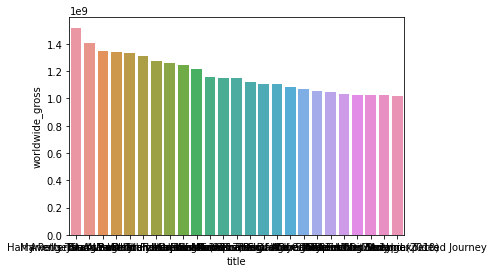

In [56]:
sns.barplot(x = "title", y = "worldwide_gross", data = top_grossing_films)

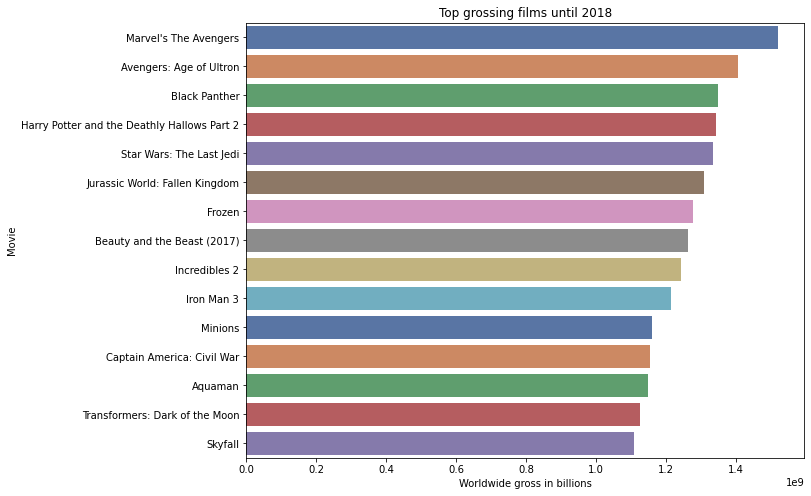

In [76]:
plt.figure(figsize=(10,8))
plt.title("Top grossing films until 2018")
sns.barplot(y = "title", x = "worldwide_gross", data = top_grossing_films[0:15], palette="deep")
plt.xlabel("Worldwide gross in billions")
plt.ylabel("Movie")
plt.savefig("movies.png")

In [58]:
studio_data = bom_movie_gross.groupby(by="studio").agg(['median', 'sum'])

In [59]:
studio_data['worldwide_gross']['sum']

studio
3D        16000000.0
A23              0.0
A24      498919000.0
ADC              0.0
AF         4655000.0
            ...     
XL               0.0
YFG              0.0
Yash     295234500.0
Zee        1671000.0
Zeit.     22029200.0
Name: sum, Length: 255, dtype: float64

In [67]:
top_grossing_studio = studio_data.sort_values(by = [('worldwide_gross', 'sum')], ascending=False)[0:10]

In [68]:
worldwide_studio_gross = top_grossing_studio['worldwide_gross']['sum']

In [69]:
worldwide_studio_gross

studio
BV         4.419038e+10
Fox        3.098037e+10
WB         3.079150e+10
Uni.       2.974681e+10
Sony       2.240472e+10
Par.       1.944420e+10
WB (NL)    1.031410e+10
LGF        8.467471e+09
LG/S       5.318924e+09
P/DW       5.076500e+09
Name: sum, dtype: float64

In [70]:
top_grossing_studio.reset_index(inplace=True)

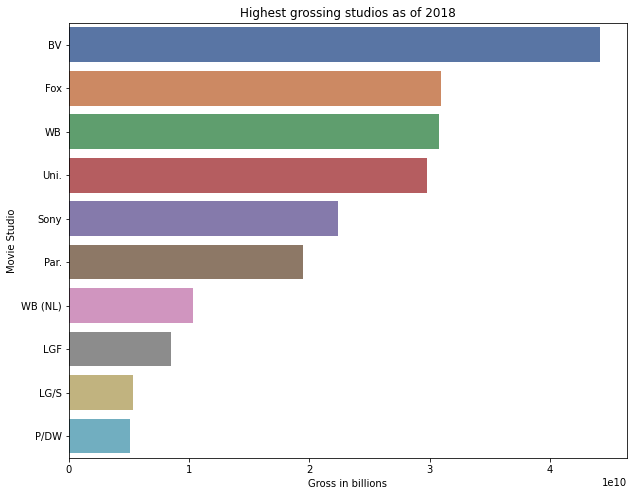

In [75]:
plt.figure(figsize=(10,8))
plt.title("Highest grossing studios as of 2018")
sns.barplot(y = top_grossing_studio["studio"], x = list(worldwide_studio_gross), palette="deep")
plt.xlabel("Gross in billions")
plt.ylabel("Movie Studio")
plt.savefig("studios.png")

## Recommendation

**From the above plot it is pretty clear that BV, Fox and WB are the top grossing studios worldwide. I would recommend Microsoft to partner with one of those studios on their movie debut**

# Most popular directors by no of votes

In [41]:
csv_files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [42]:
imdb_title_ratings = csv_files_dict['imdb_title_ratings_gz']

In [43]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [44]:
imdb_title_ratings.head()

averagerating  numvotes
tconst                             
tt10356526            8.3        31
tt10384606            8.9       559
tt1042974             6.4        20
tt1043726             4.2     50352
tt1060240             6.5        21

In [45]:
imdb_title_crew = csv_files_dict['imdb_title_crew_gz']

In [46]:
imdb_title_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [47]:
imdb_title_crew.head()

directors              writers
tconst                                                       
tt0285252                      nm0899854            nm0899854
tt0438973                            NaN  nm0175726,nm1802864
tt0462036                      nm1940585            nm1940585
tt0835418                      nm0151540  nm0310087,nm0841532
tt0878654  nm0089502,nm2291498,nm2292011            nm0284943

In [48]:
imdb_title_akas = csv_files_dict['imdb_title_akas_gz']

In [49]:
imdb_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [50]:
imdb_title_akas.head()

ordering                                    title region language  \
title_id                                                                       
tt0369610        10                            Джурасик свят     BG       bg   
tt0369610        11                        Jurashikku warudo     JP      NaN   
tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR      NaN   
tt0369610        13                  O Mundo dos Dinossauros     BR      NaN   
tt0369610        14                           Jurassic World     FR      NaN   

                 types   attributes  is_original_title  
title_id                                                
tt0369610          NaN          NaN                0.0  
tt0369610  imdbDisplay          NaN                0.0  
tt0369610  imdbDisplay          NaN                0.0  
tt0369610          NaN  short title                0.0  
tt0369610  imdbDisplay          NaN                0.0

In [51]:
imdb_name_basics = csv_files_dict['imdb_name_basics_gz']

In [52]:
imdb_name_basics.head()

primary_name  birth_year  death_year  \
nconst                                                 
nm0061671  Mary Ellen Bauder         NaN         NaN   
nm0061865       Joseph Bauer         NaN         NaN   
nm0062070         Bruce Baum         NaN         NaN   
nm0062195       Axel Baumann         NaN         NaN   
nm0062798        Pete Baxter         NaN         NaN   

                                         primary_profession  \
nconst                                                        
nm0061671         miscellaneous,production_manager,producer   
nm0061865        composer,music_department,sound_department   
nm0062070                        miscellaneous,actor,writer   
nm0062195  camera_department,cinematographer,art_department   
nm0062798  production_designer,art_department,set_decorator   

                                  known_for_titles  
nconst                                              
nm0061671  tt0837562,tt2398241,tt0844471,tt0118553  
nm0061865  tt0896534,tt6791238,tt0287072,tt1682940  
nm0062070  tt1470654,tt0363631,tt0104030,tt0102898  
nm0062195  tt0114371,tt2004304,tt1618448,tt1224387  
nm0062798  tt0452644,tt0452692,tt3458030,tt2178256

In [53]:
imdb_name_basics.reset_index(inplace=True)
imdb_title_akas.reset_index(inplace=True)
imdb_title_crew.reset_index(inplace=True)
imdb_title_ratings.reset_index(inplace=True)

## Join title_akas with title_crew using tconst.

In [54]:
imdb_movie_crew = pd.merge(imdb_title_akas, imdb_title_crew, how = 'inner', left_on= "title_id", right_on= "tconst")

In [55]:
imdb_movie_crew.head()

title_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title     tconst  directors  \
0       bg          NaN          NaN                0.0  tt0369610  nm1119880   
1      NaN  imdbDisplay          NaN                0.0  tt0369610  nm1119880   
2      NaN  imdbDisplay          NaN                0.0  tt0369610  nm1119880   
3      NaN          NaN  short title                0.0  tt0369610  nm1119880   
4      NaN  imdbDisplay          NaN                0.0  tt0369610  nm1119880   

                                             writers  
0  nm0415425,nm0798646,nm1119880,nm2081046,nm0000341  
1  nm0415425,nm0798646,nm1119880,nm2081046,nm0000341  
2  nm0415425,nm0798646,nm1119880,nm2081046,nm0000341  
3  nm0415425,nm0798646,nm1119880,nm2081046,nm0000341  
4  nm0415425,nm0798646,nm1119880,nm2081046,nm0000341

In [56]:
imdb_movie_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331703 entries, 0 to 331702
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
 8   tconst             331703 non-null  object 
 9   directors          328096 non-null  object 
 10  writers            291447 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 30.4+ MB


In [57]:
imdb_movie_crew.language.unique()

array(['bg', nan, 'he', 'fr', 'tr', 'ka', 'ta', 'te', 'en', 'sv', 'hr',
       'de', 'hi', 'sl', 'ca', 'fa', 'es', 'ml', 'cmn', 'yue', 'qbp',
       'cs', 'ar', 'ms', 'nl', 'qbn', 'tl', 'mr', 'id', 'ga', 'th', 'bs',
       'bn', 'sr', 'sk', 'et', 'it', 'hu', 'da', 'el', 'pt', 'fi', 'no',
       'ru', 'uk', 'ro', 'lt', 'ur', 'gsw', 'mi', 'az', 'eu', 'la', 'gl',
       'af', 'kn', 'pl', 'yi', 'wo', 'zu', 'xh', 'st', 'tn', 'iu', 'vi',
       'cy', 'ko', 'fro', 'gu', 'mk', 'ps', 'pa', 'zh', 'ja', 'gd', 'ku',
       'qal'], dtype=object)

In [58]:
imdb_movie_crew = imdb_movie_crew[imdb_movie_crew.language == 'en']

In [59]:
imdb_movie_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22895 entries, 87 to 331702
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           22895 non-null  object 
 1   ordering           22895 non-null  int64  
 2   title              22895 non-null  object 
 3   region             22895 non-null  object 
 4   language           22895 non-null  object 
 5   types              17937 non-null  object 
 6   attributes         3597 non-null   object 
 7   is_original_title  22895 non-null  float64
 8   tconst             22895 non-null  object 
 9   directors          22778 non-null  object 
 10  writers            20435 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.1+ MB


In [60]:
imdb_movie_crew.dropna(subset = ["directors"], inplace=True)

In [61]:
imdb_movie_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22778 entries, 87 to 331702
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           22778 non-null  object 
 1   ordering           22778 non-null  int64  
 2   title              22778 non-null  object 
 3   region             22778 non-null  object 
 4   language           22778 non-null  object 
 5   types              17841 non-null  object 
 6   attributes         3578 non-null   object 
 7   is_original_title  22778 non-null  float64
 8   tconst             22778 non-null  object 
 9   directors          22778 non-null  object 
 10  writers            20406 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.1+ MB


In [62]:
imdb_movie_crew.drop(columns=['types', 'attributes'], inplace=True)

In [63]:
imdb_movie_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22778 entries, 87 to 331702
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           22778 non-null  object 
 1   ordering           22778 non-null  int64  
 2   title              22778 non-null  object 
 3   region             22778 non-null  object 
 4   language           22778 non-null  object 
 5   is_original_title  22778 non-null  float64
 6   tconst             22778 non-null  object 
 7   directors          22778 non-null  object 
 8   writers            20406 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.7+ MB


In [64]:
imdb_movie_crew.head()

title_id  ordering                        title region language  \
87   tt10027708         2                    Miguelito    XWW       en   
89   tt10027708         4                    Miguelito     AU       en   
95    tt1014759        10  Alice Dar Sarzamin E Ajayeb     IE       en   
127   tt1014759         3          Alice in Wonderland     JP       en   
142  tt10225354         3               Returning Home    XWW       en   

     is_original_title      tconst  directors              writers  
87                 0.0  tt10027708  nm3495624            nm3495624  
89                 0.0  tt10027708  nm3495624            nm3495624  
95                 0.0   tt1014759  nm0000318  nm0941314,nm0140902  
127                0.0   tt1014759  nm0000318  nm0941314,nm0140902  
142                0.0  tt10225354  nm6265549            nm6265549

## Join title_ratings with movie_crew

In [65]:
imdb_crew_ratings = pd.merge(imdb_movie_crew, imdb_title_ratings, left_on= "title_id", right_on= "tconst", how = "inner")

In [66]:
imdb_crew_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19211 entries, 0 to 19210
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           19211 non-null  object 
 1   ordering           19211 non-null  int64  
 2   title              19211 non-null  object 
 3   region             19211 non-null  object 
 4   language           19211 non-null  object 
 5   is_original_title  19211 non-null  float64
 6   tconst_x           19211 non-null  object 
 7   directors          19211 non-null  object 
 8   writers            17796 non-null  object 
 9   tconst_y           19211 non-null  object 
 10  averagerating      19211 non-null  float64
 11  numvotes           19211 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 1.9+ MB


In [67]:
imdb_crew_ratings.head()

title_id  ordering                              title region language  \
0  tt1014759        10        Alice Dar Sarzamin E Ajayeb     IE       en   
1  tt1014759         3                Alice in Wonderland     JP       en   
2  tt1182315         2                 Black Buenos Aires    XWW       en   
3  tt1233259         1  Prince Killian and the Holy Grail     CA       en   
4  tt1263750        19                       Room in Rome    XWW       en   

   is_original_title   tconst_x  directors                        writers  \
0                0.0  tt1014759  nm0000318            nm0941314,nm0140902   
1                0.0  tt1014759  nm0000318            nm0941314,nm0140902   
2                0.0  tt1182315  nm1413776            nm0267066,nm1413776   
3                0.0  tt1233259  nm0379872            nm0602358,nm1938616   
4                0.0  tt1263750  nm0575523  nm1471503,nm0575523,nm0297545   

    tconst_y  averagerating  numvotes  
0  tt1014759            6.5    358813  
1  tt1014759            6.5    358813  
2  tt1182315            3.4       123  
3  tt1233259            2.9       521  
4  tt1263750            6.2     20455

In [68]:
imdb_crew_ratings.drop(columns=['tconst_x', 'tconst_y'], inplace=True)

In [69]:
imdb_crew_ratings.head()

title_id  ordering                              title region language  \
0  tt1014759        10        Alice Dar Sarzamin E Ajayeb     IE       en   
1  tt1014759         3                Alice in Wonderland     JP       en   
2  tt1182315         2                 Black Buenos Aires    XWW       en   
3  tt1233259         1  Prince Killian and the Holy Grail     CA       en   
4  tt1263750        19                       Room in Rome    XWW       en   

   is_original_title  directors                        writers  averagerating  \
0                0.0  nm0000318            nm0941314,nm0140902            6.5   
1                0.0  nm0000318            nm0941314,nm0140902            6.5   
2                0.0  nm1413776            nm0267066,nm1413776            3.4   
3                0.0  nm0379872            nm0602358,nm1938616            2.9   
4                0.0  nm0575523  nm1471503,nm0575523,nm0297545            6.2   

   numvotes  
0    358813  
1    358813  
2       123  
3       521  
4     20455

**We need to consider that movies with low no of votes will tend to have a higher rating. We will only look at movies over 11000 votes**

In [135]:
imdb_crew_ratings = imdb_crew_ratings[imdb_crew_ratings.numvotes > 11000]

In [136]:
imdb_crew_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 19155
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           1409 non-null   object 
 1   ordering           1409 non-null   int64  
 2   title              1409 non-null   object 
 3   region             1409 non-null   object 
 4   language           1409 non-null   object 
 5   is_original_title  1409 non-null   float64
 6   directors          1409 non-null   object 
 7   writers            1401 non-null   object 
 8   averagerating      1409 non-null   float64
 9   numvotes           1409 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 121.1+ KB


In [137]:
imdb_crew_ratings_sorted = imdb_crew_ratings.sort_values(by = ['averagerating', 'numvotes'], ascending=False)

In [138]:
imdb_crew_ratings_sorted.head()

title_id  ordering              title region language  \
10902  tt5813916         7    The Mountain II    XWW       en   
11307  tt5354160         2        Mirror Game     BD       en   
492    tt1375666        40          Inception    XWW       en   
493    tt1375666         8          Inception     US       en   
10522  tt4154796        18  Avengers: Endgame     US       en   

       is_original_title            directors  \
10902                0.0            nm3809021   
11307                0.0            nm2755490   
492                  0.0            nm0634240   
493                  0.0            nm0634240   
10522                0.0  nm0751577,nm0751648   

                                                 writers  averagerating  \
10902                                          nm3809021            9.3   
11307                      nm7861816,nm7861817,nm7861818            9.3   
492                                            nm0634240            8.8   
493                                            nm0634240            8.8   
10522  nm1321655,nm1321656,nm0498278,nm0456158,nm4160687            8.8   

       numvotes  
10902    100568  
11307     18470  
492     1841066  
493     1841066  
10522    441135

In [139]:
imdb_crew_ratings_sorted = imdb_crew_ratings_sorted.drop_duplicates(subset = ['title'])

In [140]:
imdb_crew_ratings_sorted.head()

title_id  ordering                             title region language  \
10902  tt5813916         7                   The Mountain II    XWW       en   
11307  tt5354160         2                       Mirror Game     BD       en   
492    tt1375666        40                         Inception    XWW       en   
10522  tt4154796        18                 Avengers: Endgame     US       en   
10523  tt4154796        20  Avengers: Infinity War - Part II    XWW       en   

       is_original_title            directors  \
10902                0.0            nm3809021   
11307                0.0            nm2755490   
492                  0.0            nm0634240   
10522                0.0  nm0751577,nm0751648   
10523                0.0  nm0751577,nm0751648   

                                                 writers  averagerating  \
10902                                          nm3809021            9.3   
11307                      nm7861816,nm7861817,nm7861818            9.3   
492                                            nm0634240            8.8   
10522  nm1321655,nm1321656,nm0498278,nm0456158,nm4160687            8.8   
10523  nm1321655,nm1321656,nm0498278,nm0456158,nm4160687            8.8   

       numvotes  
10902    100568  
11307     18470  
492     1841066  
10522    441135  
10523    441135

In [141]:
imdb_crew_ratings_sorted_2 = imdb_crew_ratings_sorted.directors.str.split(',').apply(pd.Series)

In [142]:
imdb_crew_ratings_sorted_2.index = imdb_crew_ratings_sorted.set_index(['title_id']).index

In [143]:
imdb_crew_ratings_sorted_2.reset_index(inplace=True)

In [144]:
imdb_crew_ratings_sorted_2.columns

Index(['title_id', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='object')

In [145]:
imdb_crew_ratings_sorted_2 = imdb_crew_ratings_sorted_2.iloc[:, 0:2]

In [146]:
imdb_crew_ratings_sorted_2.columns = ["title_id1", "director"]

In [147]:
imdb_crew_ratings_sorted_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title_id1  1145 non-null   object
 1   director   1145 non-null   object
dtypes: object(2)
memory usage: 18.0+ KB


In [148]:
imdb_crew_ratings_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 10902 to 9230
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           1145 non-null   object 
 1   ordering           1145 non-null   int64  
 2   title              1145 non-null   object 
 3   region             1145 non-null   object 
 4   language           1145 non-null   object 
 5   is_original_title  1145 non-null   float64
 6   directors          1145 non-null   object 
 7   writers            1137 non-null   object 
 8   averagerating      1145 non-null   float64
 9   numvotes           1145 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 98.4+ KB


In [149]:
imdb_crew_ratings_sorted = pd.merge(imdb_crew_ratings_sorted, imdb_crew_ratings_sorted_2, left_on = "title_id", right_on = "title_id1", how = "inner")

In [150]:
imdb_crew_ratings_sorted

title_id  ordering                                    title region  \
0     tt5813916         7                          The Mountain II    XWW   
1     tt5354160         2                              Mirror Game     BD   
2     tt1375666        40                                Inception    XWW   
3     tt4154796        18                        Avengers: Endgame     US   
4     tt4154796        18                        Avengers: Endgame     US   
...         ...       ...                                      ...    ...   
1856  tt1714203        11                          Piranha Returns     JP   
1857  tt0795461        21                            Scary Movie 5     CA   
1858  tt1517489        10  Spy Kids 4-D: All the Time in the World    XWW   
1859  tt7825208         5                               Marighella    XWW   
1860  tt4458206         1                        Code Name: K.O.Z.    XWW   

     language  is_original_title            directors  \
0          en                0.0            nm3809021   
1          en                0.0            nm2755490   
2          en                0.0            nm0634240   
3          en                0.0  nm0751577,nm0751648   
4          en                0.0  nm0751577,nm0751648   
...       ...                ...                  ...   
1856       en                0.0            nm0347657   
1857       en                0.0  nm0001878,nm0002700   
1858       en                0.0            nm0001675   
1859       en                0.0            nm0609944   
1860       en                0.0            nm2930027   

                                                writers  averagerating  \
0                                             nm3809021            9.3   
1                         nm7861816,nm7861817,nm7861818            9.3   
2                                             nm0634240            8.8   
3     nm1321655,nm1321656,nm0498278,nm0456158,nm4160687            8.8   
4     nm1321655,nm1321656,nm0498278,nm0456158,nm4160687            8.8   
...                                                 ...            ...   
1856  nm1733317,nm1729303,nm0812373,nm1539257,nm0831457            3.7   
1857  nm0001878,nm0698493,nm0915465,nm0005541,nm0424...            3.5   
1858                                          nm0001675            3.5   
1859                      nm1806027,nm0609944,nm4486011            2.8   
1860                                                NaN            1.5   

      numvotes  title_id1   director  
0       100568  tt5813916  nm3809021  
1        18470  tt5354160  nm2755490  
2      1841066  tt1375666  nm0634240  
3       441135  tt4154796  nm0751577  
4       441135  tt4154796  nm0751577  
...        ...        ...        ...  
1856     37088  tt1714203  nm0347657  
1857     60139  tt0795461  nm0001878  
1858     20043  tt1517489  nm0001675  
1859     41882  tt7825208  nm0609944  
1860     26723  tt4458206  nm2930027  

[1861 rows x 12 columns]

In [151]:
imdb_crew_ratings_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861 entries, 0 to 1860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title_id           1861 non-null   object 
 1   ordering           1861 non-null   int64  
 2   title              1861 non-null   object 
 3   region             1861 non-null   object 
 4   language           1861 non-null   object 
 5   is_original_title  1861 non-null   float64
 6   directors          1861 non-null   object 
 7   writers            1847 non-null   object 
 8   averagerating      1861 non-null   float64
 9   numvotes           1861 non-null   int64  
 10  title_id1          1861 non-null   object 
 11  director           1861 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 189.0+ KB


In [152]:
imdb_crew_ratings_sorted.drop(columns = ['ordering', 'is_original_title', 'directors', 'writers', 'title_id1'], inplace = True)

In [153]:
imdb_crew_ratings_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861 entries, 0 to 1860
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title_id       1861 non-null   object 
 1   title          1861 non-null   object 
 2   region         1861 non-null   object 
 3   language       1861 non-null   object 
 4   averagerating  1861 non-null   float64
 5   numvotes       1861 non-null   int64  
 6   director       1861 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 116.3+ KB


## Now join this df with name_basics to get the names of directors

In [154]:
imdb_directors = pd.merge(imdb_crew_ratings_sorted, imdb_name_basics, left_on = "director", right_on= "nconst", how = "inner")

In [155]:
imdb_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861 entries, 0 to 1860
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title_id            1861 non-null   object 
 1   title               1861 non-null   object 
 2   region              1861 non-null   object 
 3   language            1861 non-null   object 
 4   averagerating       1861 non-null   float64
 5   numvotes            1861 non-null   int64  
 6   director            1861 non-null   object 
 7   nconst              1861 non-null   object 
 8   primary_name        1861 non-null   object 
 9   birth_year          1412 non-null   float64
 10  death_year          32 non-null     float64
 11  primary_profession  1861 non-null   object 
 12  known_for_titles    1861 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 203.5+ KB


In [156]:
imdb_directors.head()

title_id            title region language  averagerating  numvotes  \
0  tt5813916  The Mountain II    XWW       en            9.3    100568   
1  tt2471640     The Mountain    XWW       en            8.0     17443   
2  tt5354160      Mirror Game     BD       en            9.3     18470   
3  tt1375666        Inception    XWW       en            8.8   1841066   
4  tt0816692     Interstellar     US       en            8.6   1299334   

    director     nconst            primary_name  birth_year  death_year  \
0  nm3809021  nm3809021            Alper Caglar         NaN         NaN   
1  nm3809021  nm3809021            Alper Caglar         NaN         NaN   
2  nm2755490  nm2755490  Amitabh Reza Chowdhury         NaN         NaN   
3  nm0634240  nm0634240       Christopher Nolan      1970.0         NaN   
4  nm0634240  nm0634240       Christopher Nolan      1970.0         NaN   

             primary_profession                         known_for_titles  
0        producer,writer,editor  tt2471640,tt3345952,tt5813916,tt8197998  
1        producer,writer,editor  tt2471640,tt3345952,tt5813916,tt8197998  
2  miscellaneous,director,actor  tt6974890,tt9172640,tt4853244,tt5354160  
3      writer,producer,director  tt0482571,tt1375666,tt5013056,tt0154506  
4      writer,producer,director  tt0482571,tt1375666,tt5013056,tt0154506

**Our final dataframe is ready for answering thew original question**

In [157]:
imdb_directors_grouped = imdb_directors.groupby(by = "nconst").agg("mean")

In [158]:
imdb_directors_grouped.reset_index(inplace=True)

averagerating       numvotes  birth_year  death_year
nconst                                                         
nm0000095       6.450000   70923.500000      1935.0         NaN
nm0000108       6.309524   40284.952381      1959.0         NaN
nm0000110       6.633333  370611.111111      1960.0         NaN
nm0000118       5.600000   38287.000000      1948.0         NaN
nm0000123       6.100000  117638.000000      1961.0         NaN
...                  ...            ...         ...         ...
nm5732579       5.700000   20659.000000         NaN         NaN
nm5820154       6.700000   78226.000000         NaN         NaN
nm5961051       7.600000   16623.500000      1983.0         NaN
nm7546166       7.500000   25267.000000         NaN         NaN
nm8466331       7.200000   18291.000000         NaN         NaN

[667 rows x 4 columns]

In [159]:
imdb_directors_grouped = pd.merge(imdb_directors_grouped, imdb_directors, left_on= "nconst", right_on = "nconst", how = "inner")

In [161]:
imdb_directors_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1861 entries, 0 to 1860
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nconst              1861 non-null   object 
 1   averagerating_x     1861 non-null   float64
 2   numvotes_x          1861 non-null   float64
 3   birth_year_x        1412 non-null   float64
 4   death_year_x        32 non-null     float64
 5   title_id            1861 non-null   object 
 6   title               1861 non-null   object 
 7   region              1861 non-null   object 
 8   language            1861 non-null   object 
 9   averagerating_y     1861 non-null   float64
 10  numvotes_y          1861 non-null   int64  
 11  director            1861 non-null   object 
 12  primary_name        1861 non-null   object 
 13  birth_year_y        1412 non-null   float64
 14  death_year_y        32 non-null     float64
 15  primary_profession  1861 non-null   object 
 16  known_

In [163]:
imdb_directors_grouped.sort_values(by = ["averagerating_x", "numvotes_x"], inplace=True, ascending=False)

In [164]:
imdb_directors_grouped.head()

nconst  averagerating_x  numvotes_x  birth_year_x  death_year_x  \
1780  nm2755490              9.3     18470.0           NaN           NaN   
1768  nm2572228              8.8     24326.0           NaN           NaN   
1769  nm2572228              8.8     24326.0           NaN           NaN   
1770  nm2572228              8.8     24326.0           NaN           NaN   
1771  nm2572228              8.8     24326.0           NaN           NaN   

       title_id        title region language  averagerating_y  numvotes_y  \
1780  tt5354160  Mirror Game     BD       en              9.3       18470   
1768  tt3417422       Visual    XWW       en              8.8       24326   
1769  tt3417422       Visual    XWW       en              8.8       24326   
1770  tt3417422      Visuals    XWW       en              8.8       24326   
1771  tt3417422      Visuals    XWW       en              8.8       24326   

       director            primary_name  birth_year_y  death_year_y  \
1780  nm2755490  Amitabh Reza Chowdhury           NaN           NaN   
1768  nm2572228           Jeethu Joseph           NaN           NaN   
1769  nm2572228           Jeethu Joseph           NaN           NaN   
1770  nm2572228           Jeethu Joseph           NaN           NaN   
1771  nm2572228           Jeethu Joseph           NaN           NaN   

                primary_profession                         known_for_titles  
1780  miscellaneous,director,actor  tt6974890,tt9172640,tt4853244,tt5354160  
1768      writer,director,producer  tt6620266,tt3417422,tt4429128,tt4430212  
1769      writer,director,producer  tt6620266,tt3417422,tt4429128,tt4430212  
1770      writer,director,producer  tt6620266,tt3417422,tt4429128,tt4430212  
1771      writer,director,producer  tt6620266,tt3417422,tt4429128,tt4430212

In [165]:
imdb_directors_grouped.drop_duplicates(subset = ['director', 'title_id'], inplace=True)

In [166]:
imdb_directors_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 1780 to 1792
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nconst              873 non-null    object 
 1   averagerating_x     873 non-null    float64
 2   numvotes_x          873 non-null    float64
 3   birth_year_x        662 non-null    float64
 4   death_year_x        10 non-null     float64
 5   title_id            873 non-null    object 
 6   title               873 non-null    object 
 7   region              873 non-null    object 
 8   language            873 non-null    object 
 9   averagerating_y     873 non-null    float64
 10  numvotes_y          873 non-null    int64  
 11  director            873 non-null    object 
 12  primary_name        873 non-null    object 
 13  birth_year_y        662 non-null    float64
 14  death_year_y        10 non-null     float64
 15  primary_profession  873 non-null    object 
 16  know

In [167]:
imdb_directors_grouped.head()

nconst  averagerating_x  numvotes_x  birth_year_x  death_year_x  \
1780  nm2755490             9.30     18470.0           NaN           NaN   
1768  nm2572228             8.80     24326.0           NaN           NaN   
1833  nm3809021             8.65     59005.5           NaN           NaN   
1834  nm3809021             8.65     59005.5           NaN           NaN   
1452  nm1335875             8.60     15407.0           NaN           NaN   

       title_id            title region language  averagerating_y  numvotes_y  \
1780  tt5354160      Mirror Game     BD       en              9.3       18470   
1768  tt3417422           Visual    XWW       en              8.8       24326   
1833  tt5813916  The Mountain II    XWW       en              9.3      100568   
1834  tt2471640     The Mountain    XWW       en              8.0       17443   
1452  tt7392212        The Stage     US       en              8.6       15407   

       director            primary_name  birth_year_y  death_year_y  \
1780  nm2755490  Amitabh Reza Chowdhury           NaN           NaN   
1768  nm2572228           Jeethu Joseph           NaN           NaN   
1833  nm3809021            Alper Caglar           NaN           NaN   
1834  nm3809021            Alper Caglar           NaN           NaN   
1452  nm1335875                 Sukumar           NaN           NaN   

                      primary_profession  \
1780        miscellaneous,director,actor   
1768            writer,director,producer   
1833              producer,writer,editor   
1834              producer,writer,editor   
1452  writer,director,assistant_director   

                             known_for_titles  
1780  tt6974890,tt9172640,tt4853244,tt5354160  
1768  tt6620266,tt3417422,tt4429128,tt4430212  
1833  tt2471640,tt3345952,tt5813916,tt8197998  
1834  tt2471640,tt3345952,tt5813916,tt8197998  
1452  tt2375559,tt1869226,tt5098128,tt1526323

In [168]:
imdb_directors_grouped.columns

Index(['nconst', 'averagerating_x', 'numvotes_x', 'birth_year_x',
       'death_year_x', 'title_id', 'title', 'region', 'language',
       'averagerating_y', 'numvotes_y', 'director', 'primary_name',
       'birth_year_y', 'death_year_y', 'primary_profession',
       'known_for_titles'],
      dtype='object')

In [169]:
imdb_directors_grouped_cleaned = imdb_directors_grouped.drop(columns=['nconst', 'title_id', 'averagerating_y', 'numvotes_y', 'director', 'birth_year_y', 'death_year_y', 'primary_profession',
       'known_for_titles'])

In [170]:
imdb_directors_grouped_cleaned.reset_index(inplace=True)

In [171]:
imdb_directors_grouped_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            873 non-null    int64  
 1   averagerating_x  873 non-null    float64
 2   numvotes_x       873 non-null    float64
 3   birth_year_x     662 non-null    float64
 4   death_year_x     10 non-null     float64
 5   title            873 non-null    object 
 6   region           873 non-null    object 
 7   language         873 non-null    object 
 8   primary_name     873 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 61.5+ KB


In [173]:
imdb_directors_grouped_cleaned.sort_values(by='numvotes_x', ascending=False, inplace=True)

In [175]:
imdb_directors_grouped_cleaned.drop_duplicates(subset = 'primary_name', inplace=True)

In [176]:
imdb_directors_grouped_cleaned.head()

index  averagerating_x    numvotes_x  birth_year_x  death_year_x  \
15     955         8.425000  1.248687e+06        1970.0           NaN   
44    1219         8.020000  1.131849e+06        1964.0           NaN   
47    1593         8.000000  8.208470e+05           NaN           NaN   
64     292         7.941176  7.574738e+05        1966.0           NaN   
124    505         7.700000  7.100180e+05        1961.0           NaN   

                            title region language       primary_name  
15                        Dunkirk     US       en  Christopher Nolan  
44                  Age of Ultron    XWW       en        Joss Whedon  
47                       Deadpool    XWW       en         Tim Miller  
64   Star Wars: The Force Awakens     CA       en        J.J. Abrams  
124                       Gravity     CA       en     Alfonso Cuarón

<AxesSubplot:xlabel='numvotes_x', ylabel='primary_name'>

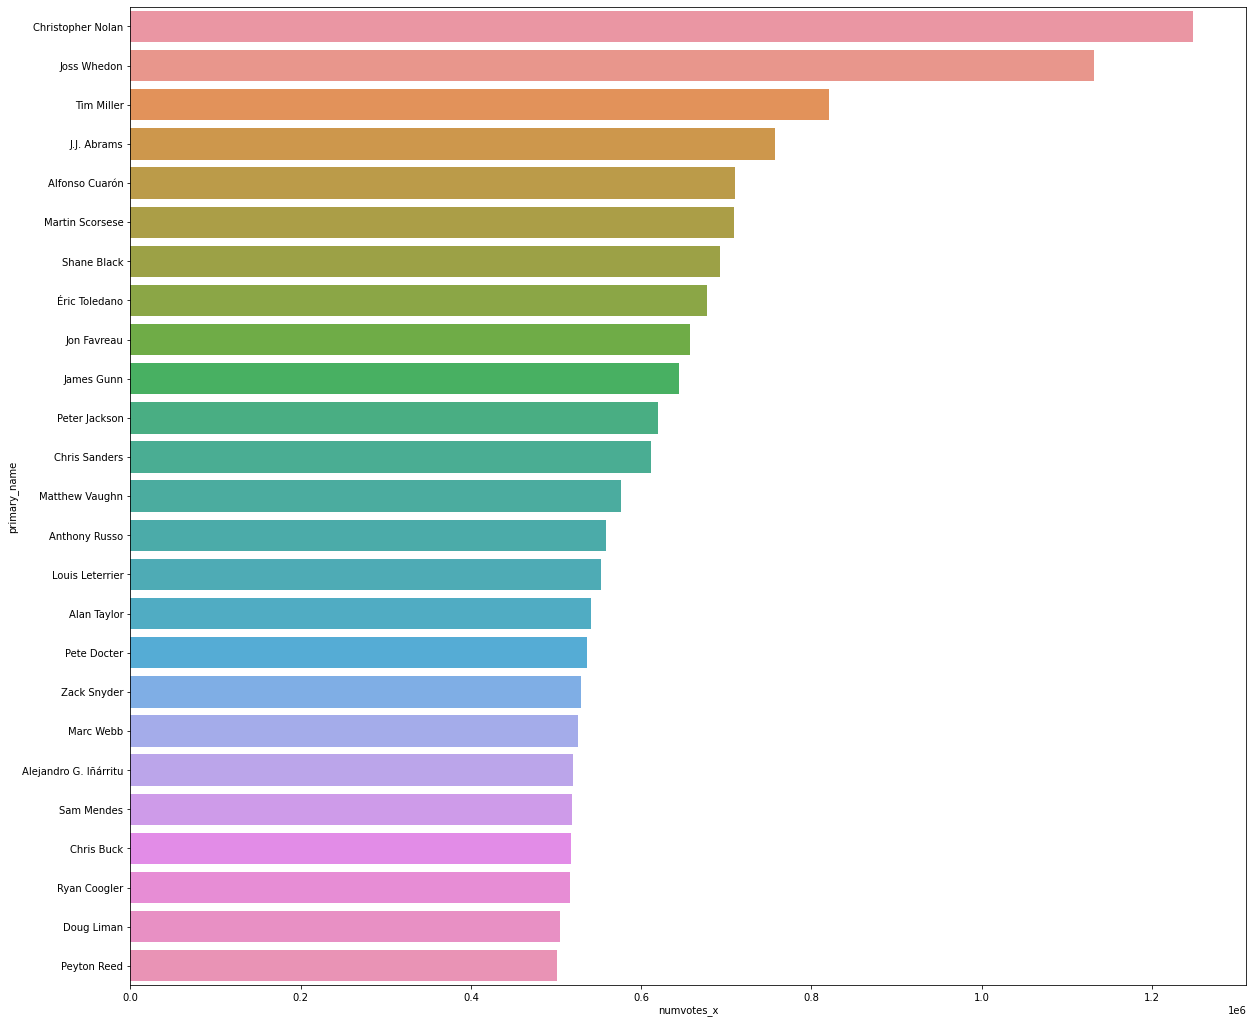

In [182]:
plt.figure(figsize = (20,18))
sns.barplot(y = "primary_name", x = "numvotes_x", data = imdb_directors_grouped_cleaned[0:25])